In [1]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import plotly.express as px

In [14]:
# importing the data set
df = pd.read_csv(r"C:\Users\user\Desktop\#\DA\practice\python\E - commerce\cleaned_data sets\merged_data.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_27244\2508483737.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\user\Desktop\#\DA\practice\python\E - commerce\cleaned_data sets\merged_data.csv")


In [32]:
df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_eng,product_weight_g,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1,-1,3442f8959a84dea7ee197c632cb2df15,2017-10-06 11:07:00,29.99,8.72,utilidades_domesticas,housewares,500,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1,-1,d1b65fc7debc3361ea86b5f14c68d2e2,2017-10-06 11:07:00,29.99,8.72,utilidades_domesticas,housewares,500,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1,-1,ce3ad9de960102d0677a81f5d0bb7b2d,2017-10-06 11:07:00,29.99,8.72,utilidades_domesticas,housewares,500,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,1,-1,c0f3eea2e14555b6faeea3dd58c1b1c3,2018-07-30 03:24:00,118.70,22.76,perfumaria,perfumery,400,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,1,-1,51a04a8a6bdcb23deccc82b0b80742cf,2018-08-13 08:55:00,159.90,19.22,automotivo,auto,420,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12,14840,guariba,SP


In [6]:
pd.set_option('display.max.columns',None)
pd.set_option('display.max.rows',None)


## initial inseption


In [7]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_eng,product_weight_g,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017,1,-1,3442f8959a84dea7ee197c632cb2df15,10/6/2017 11:07,29.99,8.72,utilidades_domesticas,housewares,500,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017,1,-1,d1b65fc7debc3361ea86b5f14c68d2e2,10/6/2017 11:07,29.99,8.72,utilidades_domesticas,housewares,500,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017,1,-1,ce3ad9de960102d0677a81f5d0bb7b2d,10/6/2017 11:07,29.99,8.72,utilidades_domesticas,housewares,500,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018,1,-1,c0f3eea2e14555b6faeea3dd58c1b1c3,7/30/2018 3:24,118.70,22.76,perfumaria,perfumery,400,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018,1,-1,51a04a8a6bdcb23deccc82b0b80742cf,8/13/2018 8:55,159.90,19.22,automotivo,auto,420,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12,14840,guariba,SP


In [10]:
df.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_eng,product_weight_g,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
118429,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018,1,-1,-1,2/12/2018 13:10,174.90,20.10,bebes,baby,4950,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,credit_card,3,195.00,17602,tupa,SP
118430,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017,1,-1,-1,9/5/2017 15:04,205.99,65.02,eletrodomesticos_2,home_appliances_2,13300,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,credit_card,5,271.01,8290,sao paulo,SP
118431,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018,1,-1,-1,1/12/2018 21:36,179.99,40.59,informatica_acessorios,computers_accessories,6550,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,credit_card,4,441.16,37175,ilicinea,MG
118432,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018,2,-1,-1,1/12/2018 21:36,179.99,40.59,informatica_acessorios,computers_accessories,6550,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,credit_card,4,441.16,37175,ilicinea,MG
118433,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,3/8/2018 20:57,3/9/2018 11:20,3/9/2018 22:11,3/16/2018 13:08,4/3/2018,1,-1,-1,3/15/2018 10:55,68.50,18.36,beleza_saude,health_beauty,150,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR,1,debit_card,1,86.86,14407,franca,SP


In [11]:
df.describe()

,order_item_id,product_id,seller_id,price,freight_value,product_weight_g,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,118434.000000,118434.0,118434.0,118434.000000,118434.000000,118434.000000,118434.000000,118434.000000,118434.000000,118434.000000,118434.000000
mean,1.180531,-1.0,-1.0,120.501016,20.019232,2099.225096,35034.264392,1.094179,2.937349,172.847757,24271.587737
std,0.718999,0.0,0.0,183.869718,15.808778,3779.295179,29819.290218,0.728301,2.774146,268.256631,27552.566412
min,-1.000000,-1.0,-1.0,0.850000,0.000000,0.000000,1003.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-1.0,-1.0,39.900000,13.080000,300.000000,11310.000000,1.000000,1.000000,60.860000,6180.000000
50%,1.000000,-1.0,-1.0,74.900000,16.290000,700.000000,24240.000000,1.000000,2.000000,108.200000,13488.500000
75%,1.000000,-1.0,-1.0,133.000000,21.150000,1800.000000,58464.500000,1.000000,4.000000,189.240000,27277.000000
max,21.000000,-1.0,-1.0,6735.000000,409.680000,40425.000000,99990.000000,29.000000,24.000000,13664.080000,99730.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118434 non-null  object        
 1   customer_id                    118434 non-null  object        
 2   order_status                   118434 non-null  object        
 3   order_purchase_timestamp       118434 non-null  datetime64[ns]
 4   order_approved_at              118434 non-null  datetime64[ns]
 5   order_delivered_carrier_date   118434 non-null  datetime64[ns]
 6   order_delivered_customer_date  118434 non-null  datetime64[ns]
 7   order_estimated_delivery_date  118434 non-null  datetime64[ns]
 8   order_item_id                  118434 non-null  int64         
 9   product_id                     118434 non-null  object        
 10  seller_id                      118434 non-null  object        
 11  

In [22]:
df.shape

(118434, 28)

In [15]:
# to get the view of all the columns 
pd.set_option('display.max.columns',None)
# to get the view of all the columns 
pd.set_option('display.max.rows', None)

In [30]:
# changing all the columns to apporiate data type to enhance the visualisation
df['order_id'] = df['order_id'].astype(str)  # Identifier columns
df['customer_id'] = df['customer_id'].astype(str)
df['order_status'] = df['order_status'].astype(str)  # Categorical/text data
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')  # DateTime
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'], errors='coerce')  # DateTime
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'], errors='coerce')  # DateTime
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], errors='coerce')  # DateTime
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'], errors='coerce')  # DateTime
df['order_item_id'] = pd.to_numeric(df['order_item_id'], errors='coerce')  # Integer
df['product_id'] = df['product_id'].astype(str)  # Identifier
df['seller_id'] = df['seller_id'].astype(str)  # Identifier
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'], errors='coerce')  # DateTime
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Numeric
df['freight_value'] = pd.to_numeric(df['freight_value'], errors='coerce')  # Numeric
df['product_category_name'] = df['product_category_name'].astype(str)  # Categorical/text data
df['product_weight_g'] = pd.to_numeric(df['product_weight_g'], errors='coerce')  # Numeric
df['customer_unique_id'] = df['customer_unique_id'].astype(str)  # Identifier
df['customer_zip_code_prefix'] = df['customer_zip_code_prefix'].astype(str)  # Categorical/text data
df['customer_city'] = df['customer_city'].astype(str)  # Categorical/text data
df['customer_state'] = df['customer_state'].astype(str)  # Categorical/text data
df['payment_sequential'] = pd.to_numeric(df['payment_sequential'], errors='coerce')  # Numeric
df['payment_type'] = df['payment_type'].astype(str)  # Categorical/text data
df['payment_installments'] = pd.to_numeric(df['payment_installments'], errors='coerce')  # Numeric
df['payment_value'] = pd.to_numeric(df['payment_value'], errors='coerce')  # Numeric
df['seller_zip_code_prefix'] = df['seller_zip_code_prefix'].astype(str)  # Categorical/text data
df['seller_city'] = df['seller_city'].astype(str)  # Categorical/text data
df['seller_state'] = df['seller_state'].astype(str)  # Categorical/text data
df['product_category_name_eng'] = df['product_category_name_eng'].astype(str)  # Categorical/text data


# Visualizations

## Sales by Order Status (Bar Chart)

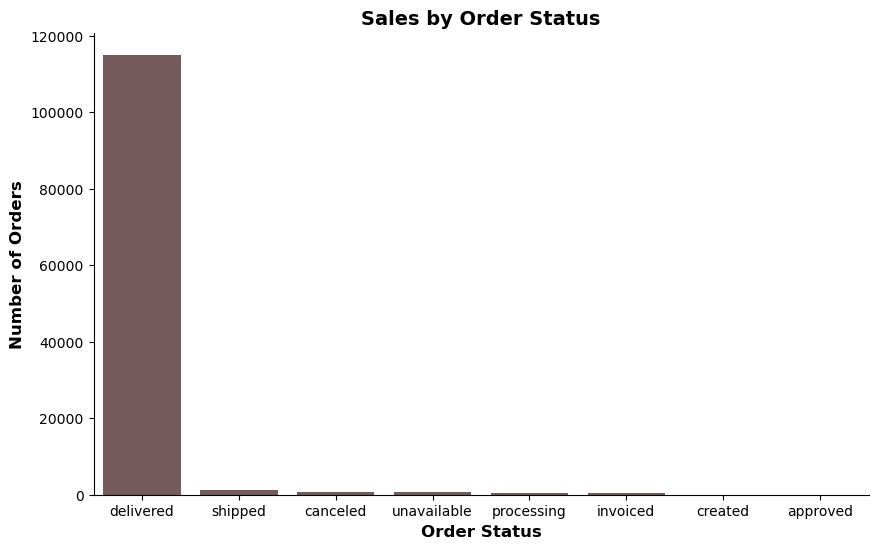

In [90]:
# Grouping order status
order_status_count = df['order_status'].value_counts()

# Plot
plt.figure(figsize=(10,6))

# Plot with customized color
sns.barplot(x=order_status_count.index, y=order_status_count.values, color='#795757')

# Customize the plot
plt.title('Sales by Order Status', fontsize=14, fontweight='bold')
plt.xlabel('Order Status', fontsize=12, fontweight='bold')
plt.ylabel('Number of Orders', fontsize=12, fontweight='bold')

# Remove gridlines
plt.grid(False)

# Remove top and right borders (spines)
sns.despine()

plt.show()


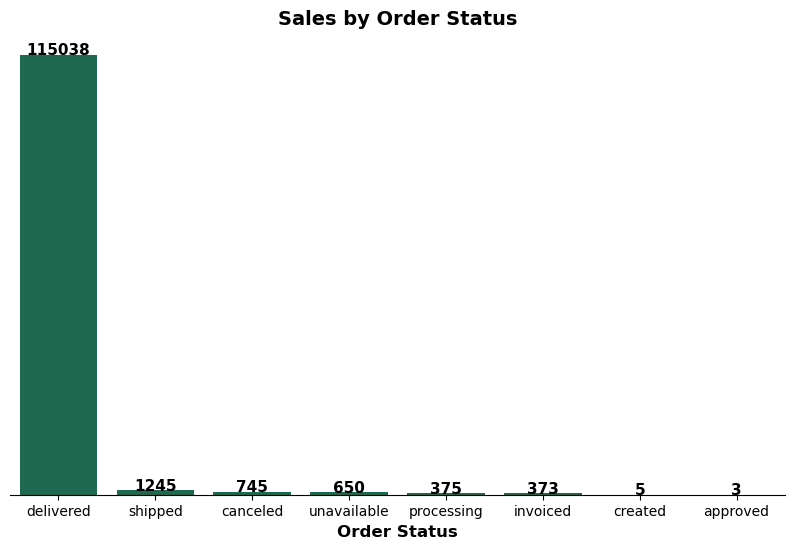

In [92]:
# Grouping order status
order_status_count = df['order_status'].value_counts()

# Plot
plt.figure(figsize=(10,6))

# Plot with customized color and adjust bar width for spacing
ax = sns.barplot(x=order_status_count.index, y=order_status_count.values, color='#117554', width=0.8)

# Add labels on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', fontweight='bold')

# Customize the plot
plt.title('Sales by Order Status', fontsize=14, fontweight='bold')
plt.xlabel('Order Status', fontsize=12, fontweight='bold')

# Remove the y-axis
ax.yaxis.set_visible(False)

# Remove gridlines
plt.grid(False)

# Remove top, right, and left spines (borders)
sns.despine(left=True)

plt.show()


## Monthly Sales Trend (Line Chart)

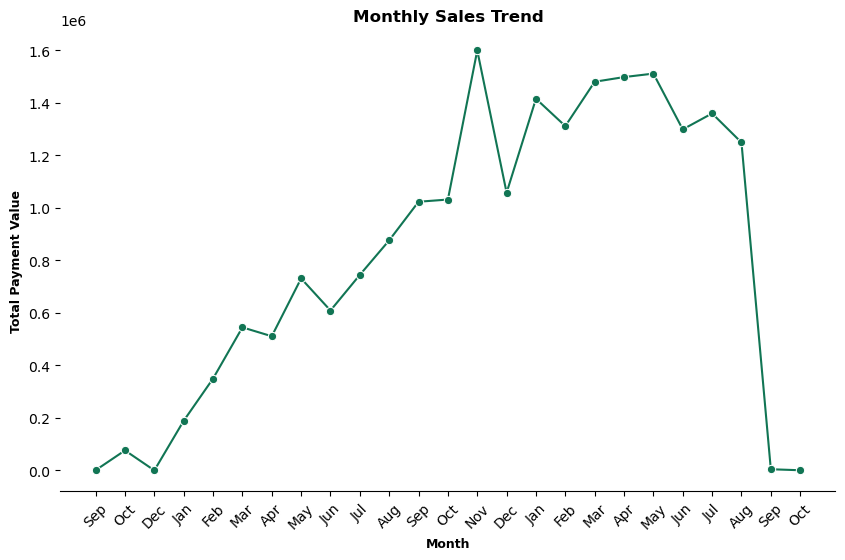

In [115]:
# Convert timestamp to datetime and extract the month
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['Month'] = df['order_purchase_timestamp'].dt.to_period('M')

# Group by month and calculate total payment value
monthly_sales = df.groupby('Month')['payment_value'].sum()

# Plot
plt.figure(figsize=(10,6))

# Create the line plot using seaborn
ax = sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, color='#117554', marker='o')

# Customize x-axis to show abbreviated month names only once per year
month_names = monthly_sales.index.to_timestamp().strftime('%b')
ax.set_xticks(range(len(month_names)))
ax.set_xticklabels(month_names, rotation=45)

# Customize the plot
plt.title('Monthly Sales Trend', fontsize=12, fontweight=550)
plt.xlabel('Month', fontsize=9, fontweight=550)
plt.ylabel('Total Payment Value', fontsize=9, fontweight=550)

# Remove gridlines
plt.grid(False)

# Remove top, right, and left spines (borders)
sns.despine(left=True)

plt.show()


## Average Delivery Time by Product Category (Bar Chart)


### Top product

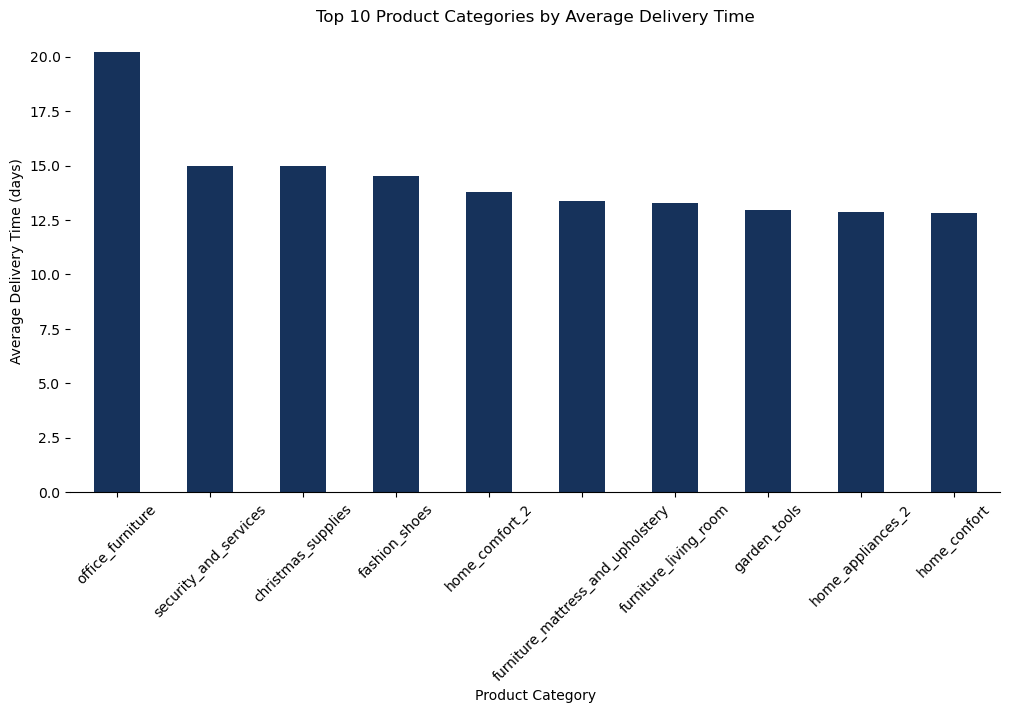

In [119]:
# Calculate delivery time
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# Calculate average delivery time by product category
avg_delivery_time = df.groupby('product_category_name_eng')['delivery_time'].mean()

# Plot top products
plt.figure(figsize=(12,6))
top_products = avg_delivery_time.sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='#16325B')
plt.title('Top 10 Product Categories by Average Delivery Time')
plt.xlabel('Product Category')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=45)
plt.grid(False)
sns.despine(left=True)
plt.show()


### bottom products

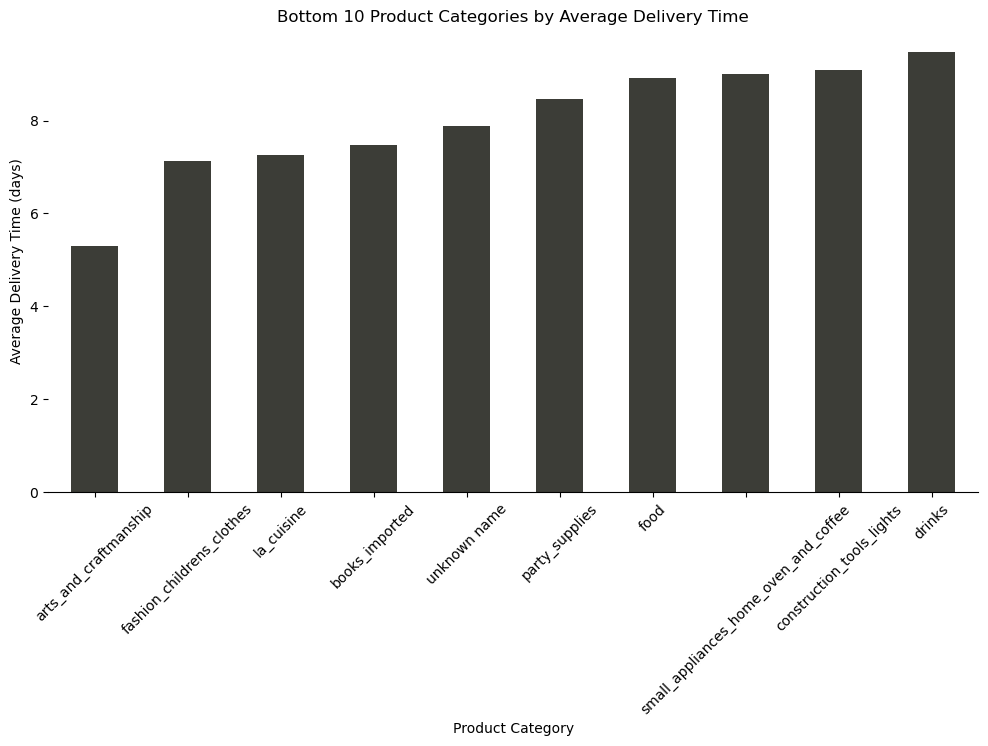

In [120]:
# Ploting bottom products
plt.figure(figsize=(12,6))
bottom_products = avg_delivery_time.sort_values(ascending=True).head(10)
bottom_products.plot(kind='bar', color='#3C3D37')
plt.title('Bottom 10 Product Categories by Average Delivery Time')
plt.xlabel('Product Category')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=45)
plt.grid(False)
sns.despine(left=True)
plt.show()


## Top 10 Product Categories by Sales (Horizontal Bar Chart)


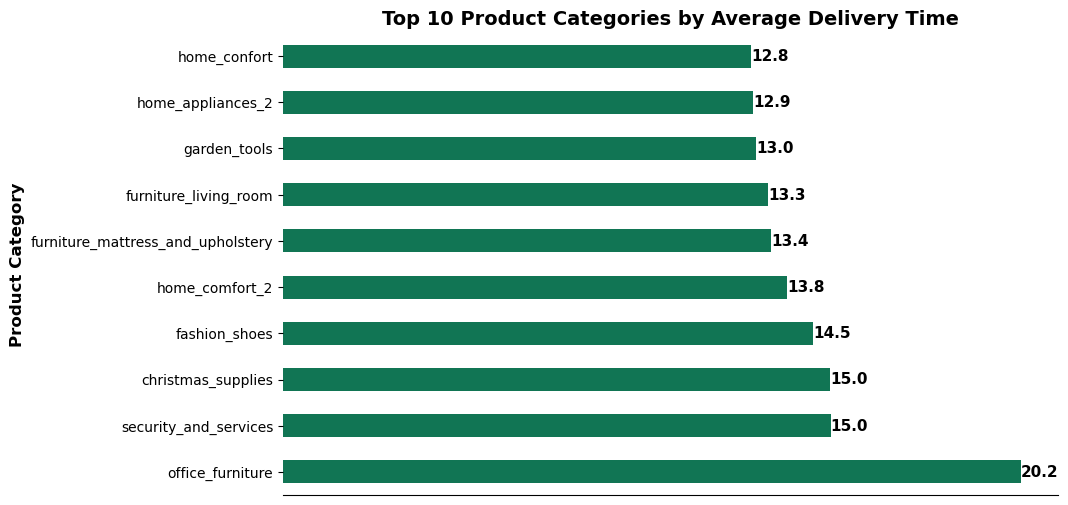

In [124]:
# Calculate delivery time
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# Calculate average delivery time by product category
avg_delivery_time = df.groupby('product_category_name_eng')['delivery_time'].mean()

# Identify top 10 products
top_10_products = avg_delivery_time.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
ax = top_10_products.plot(kind='barh', color='#117554')

# Add labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}', (p.get_width(), p.get_y() + p.get_height()/2.),
                ha='left', va='center', fontsize=11, color='black', fontweight='semibold')

# Customize the plot
plt.title('Top 10 Product Categories by Average Delivery Time', fontsize=14, fontweight='semibold')
plt.xlabel('Average Delivery Time (days)', fontsize=12, fontweight='semibold')
plt.ylabel('Product Category', fontsize=12, fontweight='semibold')

# Removing the x-axis
ax.xaxis.set_visible(False)

# Removing gridlines
plt.grid(False)

# Removing top, right, and left spines (borders)
sns.despine(left=True)

plt.show()


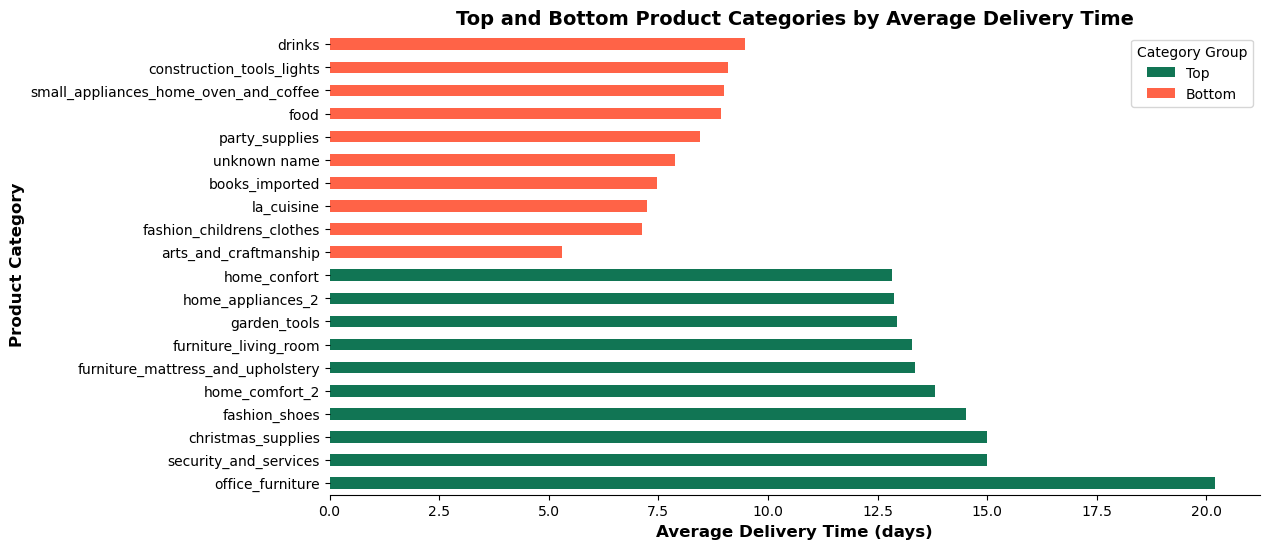

In [121]:
# Calculate delivery time
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# Calculate average delivery time by product category
avg_delivery_time = df.groupby('product_category_name_eng')['delivery_time'].mean()

# Identify top and bottom products
top_products = avg_delivery_time.sort_values(ascending=False).head(10)
bottom_products = avg_delivery_time.sort_values(ascending=True).head(10)

# Combine top and bottom products into a single DataFrame
combined = pd.concat([
    top_products.rename('Top'),
    bottom_products.rename('Bottom')
], axis=1).fillna(0)  # Fill NaNs with 0s for categories that are only in one group

# Plot
plt.figure(figsize=(12,6))

# Stacked bar plot
combined.plot(kind='barh', stacked=True, color=['#117554', '#ff6347'], ax=plt.gca())

# Customize the plot
plt.title('Top and Bottom Product Categories by Average Delivery Time', fontsize=14, fontweight='semibold')
plt.xlabel('Average Delivery Time (days)', fontsize=12, fontweight='semibold')
plt.ylabel('Product Category', fontsize=12, fontweight='semibold')
plt.legend(title='Category Group')
plt.grid(False)
sns.despine(left=True)

plt.show()


## Number of Orders vs Average Payment Value (Scatter Plot)

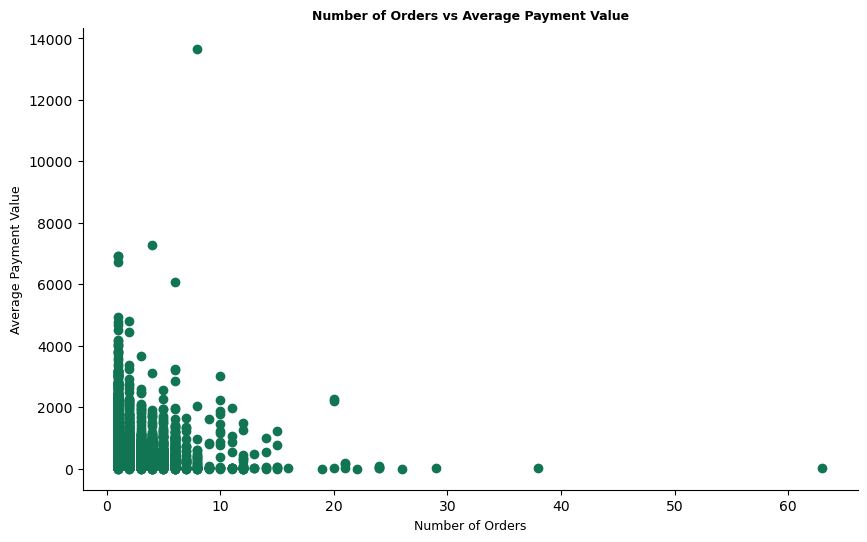

In [128]:
# Group by customer ID to get number of orders and average payment value
customer_orders = df.groupby('customer_id')['order_id'].count()
customer_payment = df.groupby('customer_id')['payment_value'].mean()

# Plot
plt.figure(figsize=(10,6))
plt.scatter(customer_orders, customer_payment, color='#117554')

# Customizing the plot
plt.title('Number of Orders vs Average Payment Value', fontsize=9, fontweight=550)
plt.xlabel('Number of Orders '000'', fontsize=9, fontweight=500)
plt.ylabel('Average Payment Value', fontsize=9, fontweight=500)

# Remove gridlines
plt.grid(False)

# Remove top, right, and left spines (borders)
sns.despine()

plt.show()


## Order Distribution by Hour of Day (Heatmap)

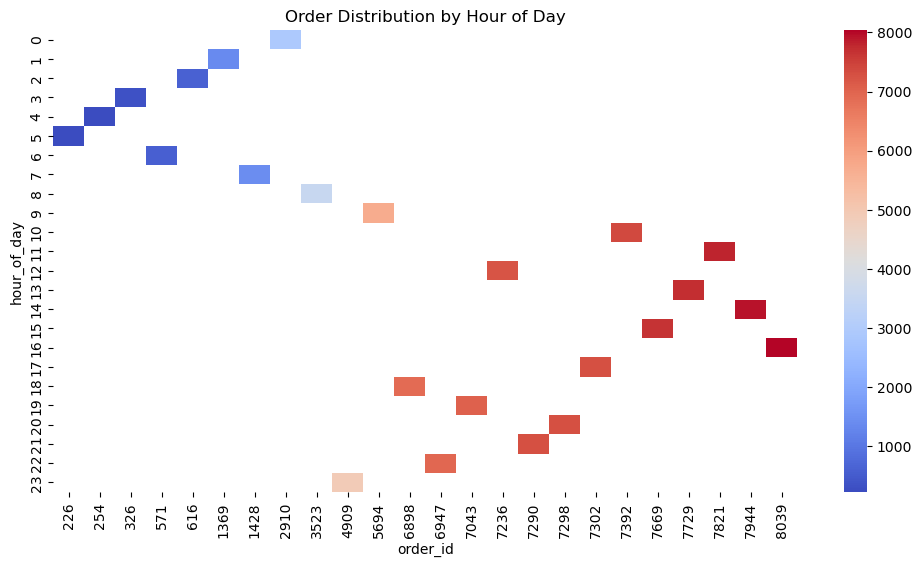

In [35]:
df['hour_of_day'] = df['order_purchase_timestamp'].dt.hour
hourly_orders = df.groupby('hour_of_day')['order_id'].count().reset_index()

# Plot heatmap
hourly_orders_pivot = hourly_orders.pivot(index='hour_of_day', columns='order_id', values='order_id')
plt.figure(figsize=(12,6))
sns.heatmap(hourly_orders_pivot, cmap='coolwarm')
plt.title('Order Distribution by Hour of Day')
plt.show()


 ## Payment Type Distribution (Pie Chart)

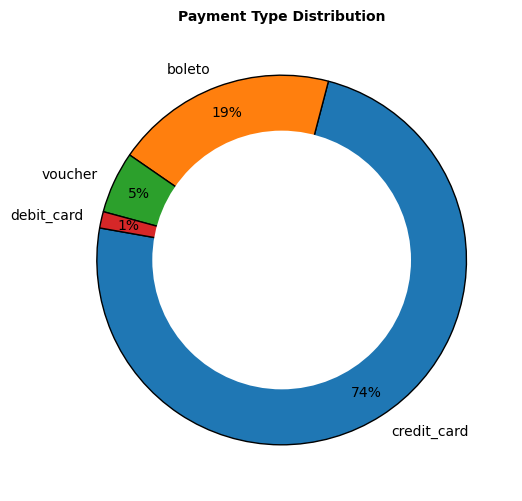

In [49]:
# Geting the counts for payment types after filtering
payment_type_counts = filtered_df['payment_type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8,6))
plt.pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.0f%%', 
        startangle=170, wedgeprops={'edgecolor': 'black'}, pctdistance=0.85)

# Add a circle at the center to make it a donut chart (optional)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Ensure the pie chart is drawn as a circle
plt.gca().set_aspect('equal')

plt.title('Payment Type Distribution',  fontsize=10, fontweight='semibold')
plt.show()

## Correlation Between Price and Freight Value (Scatter Plot)

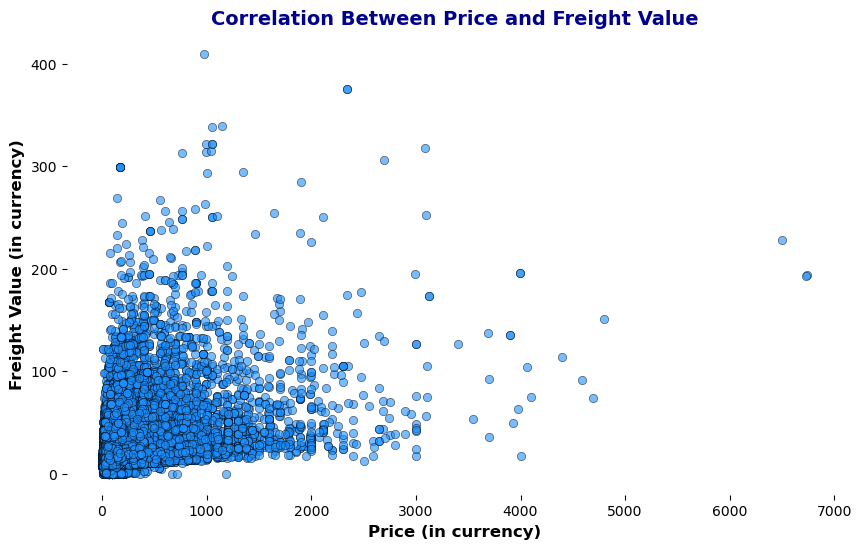

In [58]:
# Create a formatted scatter plot
plt.figure(figsize=(10,6))

# Plot with improved styling
plt.scatter(df['price'], df['freight_value'], alpha=0.6, c='dodgerblue', edgecolor='k', linewidth=0.5)

# Set titles and labels with custom font sizes and weights
plt.title('Correlation Between Price and Freight Value', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Price (in currency)', fontsize=12, fontweight='semibold')
plt.ylabel('Freight Value (in currency)', fontsize=12, fontweight='semibold')

# Customize tick labels for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Disable gridlines
plt.grid(False)

# Remove the plot spines (borders)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Display the plot
plt.show()


##  Delivery Performance by Estimated vs Actual Delivery (Bar Chart) 

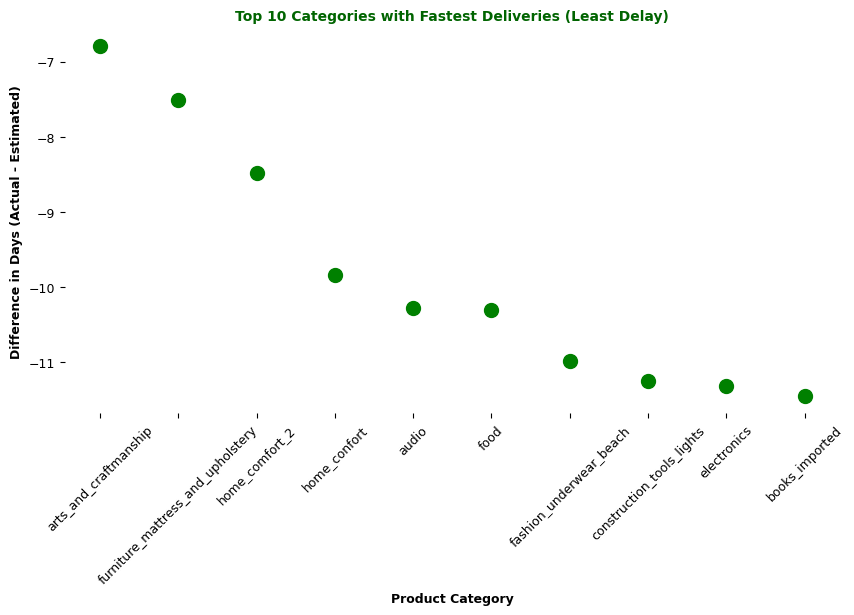

In [80]:
# Plot the top categories as a scatter plot
plt.figure(figsize=(10,5))
plt.scatter(top_categories.index, top_categories.values, color='green', s=100)

# Format the plot
plt.title('Top 10 Categories with Fastest Deliveries (Least Delay)', fontsize=10, fontweight='bold', color='darkgreen')
plt.xlabel('Product Category', fontsize=9, fontweight='semibold')
plt.ylabel('Difference in Days (Actual - Estimated)', fontsize=9, fontweight='semibold')
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)

# Remove the spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()


## Categories with the highest average delivery difference (largest delays)

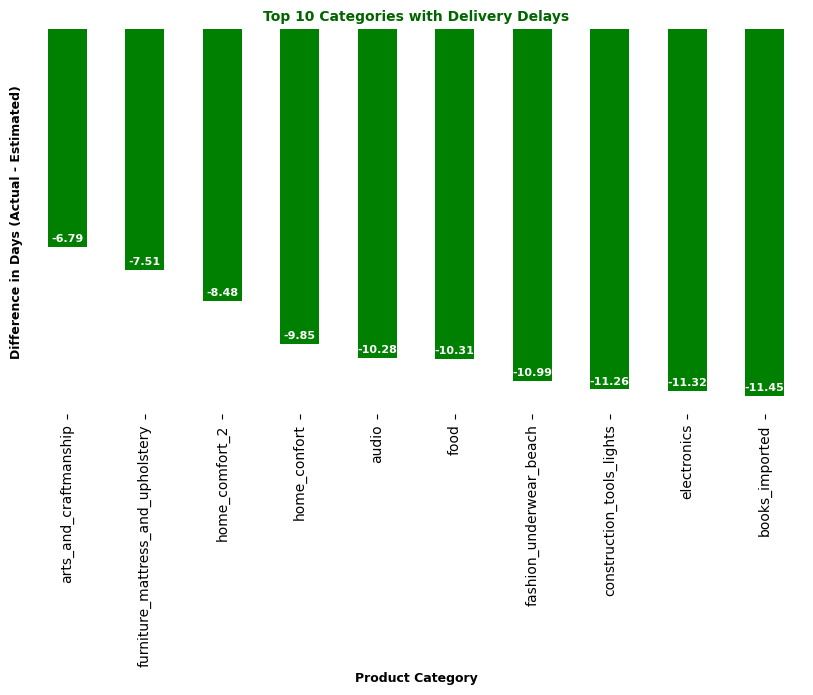

In [78]:
# Calculate the difference in delivery days
df['delivery_diff'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days
avg_delivery_diff = df.groupby('product_category_name_eng')['delivery_diff'].mean()

# Get the top 10 categories with the highest average delivery difference (largest delays)
top_categories = avg_delivery_diff.nlargest(10)

# Plot the top categories
plt.figure(figsize=(10,5))
ax = top_categories.plot(kind='bar', color='green')

# Format the plot
plt.title('Top 10 Categories with Delivery Delays', fontsize=10, fontweight='bold', color='darkgreen')
plt.xlabel('Product Category', fontsize=9, fontweight='semibold')
plt.ylabel('Difference in Days (Actual - Estimated)', fontsize=9, fontweight='semibold')

# Remove the y-axis ticks (but keep the axis label)
ax.set_yticks([])

# Add labels to the bars with white text
for i, value in enumerate(top_categories):
    ax.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=8, fontweight='semibold', color='white')

# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()


## Top 10 Categories with Highest Number of Orders

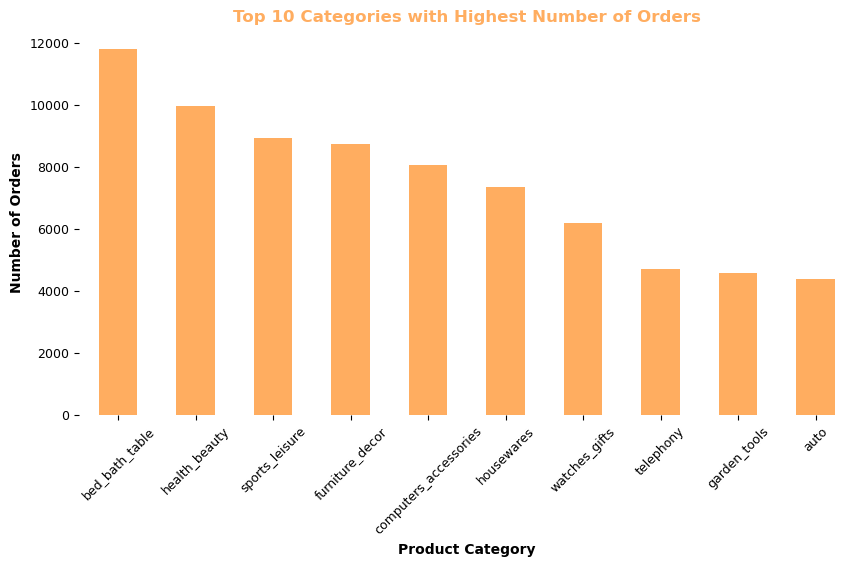

In [84]:
# Calculate the count of orders for each product category
order_counts = df['product_category_name_eng'].value_counts()

# Get the top 10 categories with the highest number of orders
top_order_categories = order_counts.head(10)

# Plot the top order categories
plt.figure(figsize=(10,5))
ax = top_order_categories.plot(kind='bar', color='#FFAD60')

# Format the plot
plt.title('Top 10 Categories with Highest Number of Orders', fontsize=12, fontweight='bold', color='#FFAD60')
plt.xlabel('Product Category', fontsize=10, fontweight='semibold')
plt.ylabel('Number of Orders', fontsize=10, fontweight='semibold')
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)

# Remove the gridlines
plt.grid(False)

# Remove spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show the plot
plt.show()


## Top 5 Categories with Highest Average Freight Valu

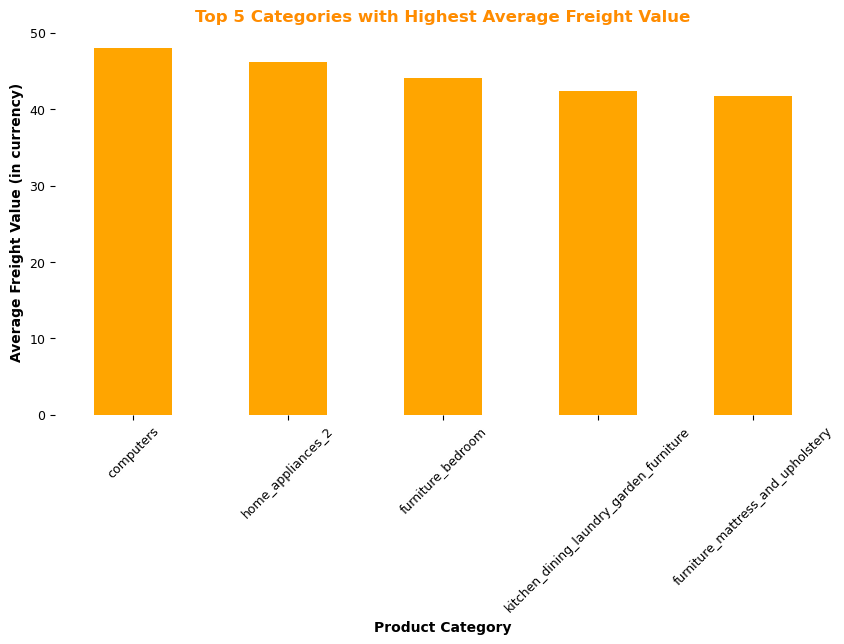

In [87]:
# Calculate the average freight value for each product category
avg_freight_value = df.groupby('product_category_name_eng')['freight_value'].mean()

# Get the top 5 categories with the highest freight value
top_freight_categories = avg_freight_value.nlargest(5)

# Plot the average freight value
plt.figure(figsize=(10,5))
ax = top_freight_categories.plot(kind='bar', color='orange')

# Format the plot
plt.title('Top 5 Categories with Highest Average Freight Value', fontsize=12, fontweight='bold', color='darkorange')
plt.xlabel('Product Category', fontsize=10, fontweight='semibold')
plt.ylabel('Average Freight Value (in currency)', fontsize=10, fontweight='semibold')
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)

# Remove the gridlines
plt.grid(False)

# Remove spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show the plot
plt.show()


## Bottom 5 Categories with Lowest Average Freight Value

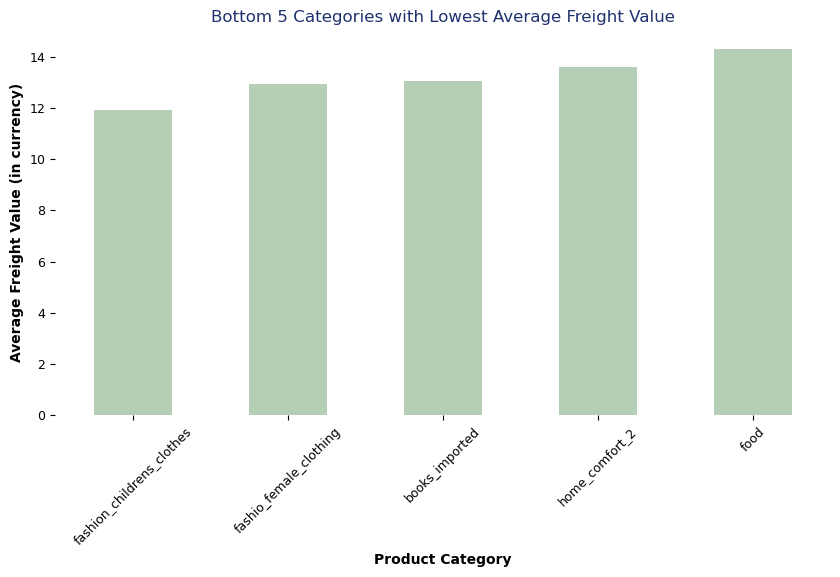

In [91]:
# Calculate the average freight value for each product category
avg_freight_value = df.groupby('product_category_name_eng')['freight_value'].mean()

# Get the bottom 5 categories with the lowest freight value
bottom_freight_categories = avg_freight_value.nsmallest(5)

# Plot the average freight value for the bottom categories
plt.figure(figsize=(10,5))
ax = bottom_freight_categories.plot(kind='bar', color='#B5CFB7')

# Format the plot
plt.title('Bottom 5 Categories with Lowest Average Freight Value', fontsize=12, fontweight=400, color='#1F316F')
plt.xlabel('Product Category', fontsize=10, fontweight='semibold')
plt.ylabel('Average Freight Value (in currency)', fontsize=10, fontweight='semibold')
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)

# Remove the gridlines
plt.grid(False)

# Remove spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show the plot
plt.show()


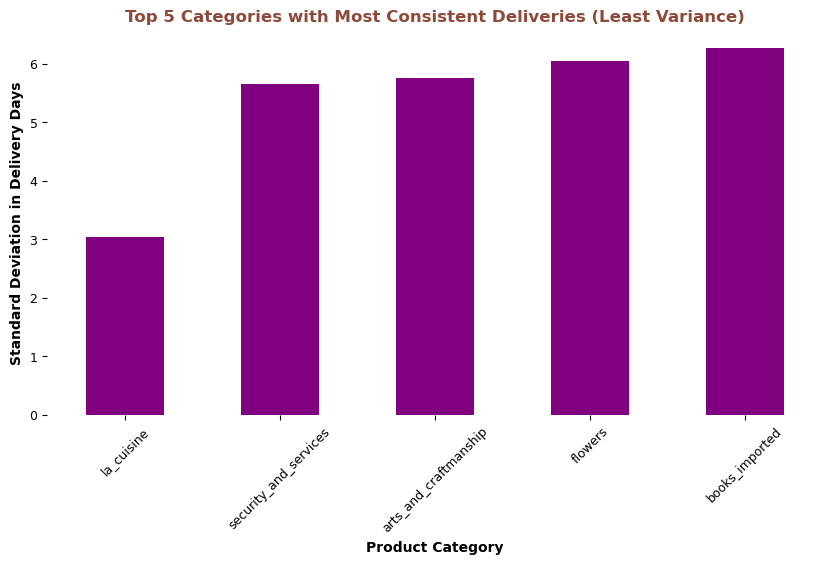

In [94]:
# Calculate the standard deviation of delivery difference for each product category
delivery_std = df.groupby('product_category_name_eng')['delivery_diff'].std()

# Get the top 5 categories with the least variance (most consistent deliveries)
top_consistent_categories = delivery_std.nsmallest(5)

# Plot the most consistent delivery categories
plt.figure(figsize=(10,5))
ax = top_consistent_categories.plot(kind='bar', color='purple')

# Format the plot
plt.title('Top 5 Categories with Most Consistent Deliveries (Least Variance)', fontsize=12, fontweight='bold', color='#8D493A')
plt.xlabel('Product Category', fontsize=10, fontweight='semibold')
plt.ylabel('Standard Deviation in Delivery Days', fontsize=10, fontweight='semibold')
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)

# Remove the gridlines
plt.grid(False)

# Remove spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show the plot
plt.show()


## Sales Trend by Product Category (Line Chart)

### Sales Trend for Top 10 Product Categories

<Figure size 1200x600 with 0 Axes>

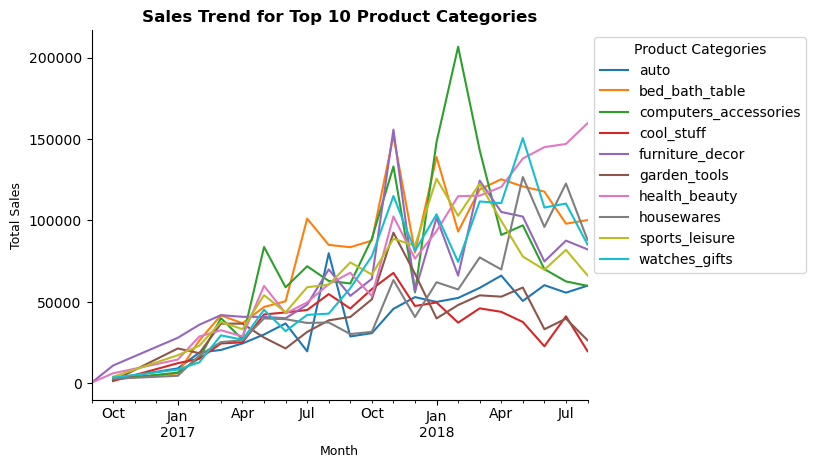

In [146]:
top_10_categories = df.groupby('product_category_name_eng')['payment_value'].sum().nlargest(10).index

# Filter the data to include only the top 10 product categories
monthly_category_sales = df[df['product_category_name_eng'].isin(top_10_categories)] \
    .groupby([df['order_purchase_timestamp'].dt.to_period('M'), 'product_category_name_eng'])['payment_value'].sum() \
    .unstack()

# Plot
plt.figure(figsize=(12,6))
monthly_category_sales.plot(kind='line')

# Customize the plot
plt.title('Sales Trend for Top 10 Product Categories', fontsize=12, fontweight='semibold')
plt.xlabel('Month', fontsize=9)
plt.ylabel('Total Sales', fontsize=9)
plt.legend(title='Product Categories', loc='upper left', bbox_to_anchor=(1, 1))  # Add legend outside the plot
plt.grid(False)  # Remove gridlines
sns.despine()    # Remove spines

### Bottom 10 product categories based on total sales

<Figure size 1200x600 with 0 Axes>

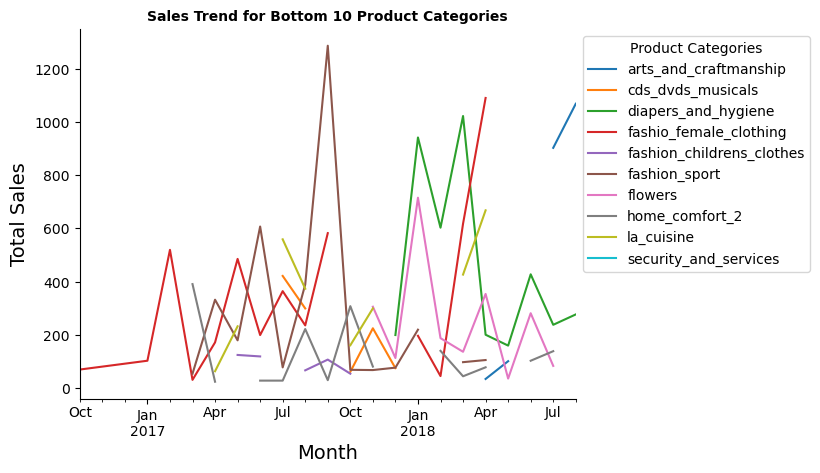

In [97]:
# Identify the bottom 10 product categories based on total sales
bottom_10_categories = df.groupby('product_category_name_eng')['payment_value'].sum().nsmallest(10).index

# Filter the data to include only the bottom 10 product categories
monthly_category_sales_bottom = df[df['product_category_name_eng'].isin(bottom_10_categories)] \
    .groupby([df['order_purchase_timestamp'].dt.to_period('M'), 'product_category_name_eng'])['payment_value'].sum() \
    .unstack()

# Plot
plt.figure(figsize=(12,6))
monthly_category_sales_bottom.plot(kind='line')

# Customize the plot
plt.title('Sales Trend for Bottom 10 Product Categories', fontsize=10, fontweight='semibold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title='Product Categories', loc='upper left', bbox_to_anchor=(1, 1))  # Add legend outside the plot
plt.grid(False)  # Remove gridlines
sns.despine()    # Remove spines

plt.show()

##  Customer Loyalty (Histogram)

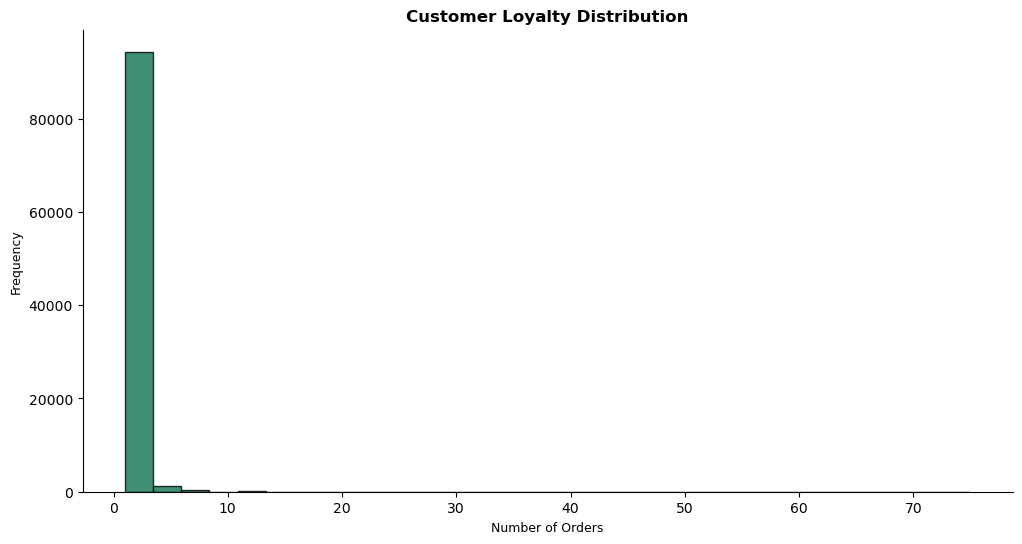

In [149]:
# Customer order count
customer_order_count = df.groupby('customer_unique_id')['order_id'].count()

# Plot
plt.figure(figsize=(12,6))  # Larger figure for better readability
plt.hist(customer_order_count, bins=30, color='#117554', edgecolor='black', alpha=0.8)  # Custom color and edge

# Customize the plot
plt.title('Customer Loyalty Distribution', fontsize=12, fontweight='semibold')
plt.xlabel('Number of Orders', fontsize=9)
plt.ylabel('Frequency', fontsize=9)

# Remove gridlines and spines
plt.grid(False)
sns.despine()

# Display plot
plt.show()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118434 non-null  object        
 1   customer_id                    118434 non-null  object        
 2   order_status                   118434 non-null  object        
 3   order_purchase_timestamp       118434 non-null  datetime64[ns]
 4   order_approved_at              118434 non-null  datetime64[ns]
 5   order_delivered_carrier_date   118434 non-null  datetime64[ns]
 6   order_delivered_customer_date  118434 non-null  datetime64[ns]
 7   order_estimated_delivery_date  118434 non-null  datetime64[ns]
 8   order_item_id                  118434 non-null  int64         
 9   product_id                     118434 non-null  object        
 10  seller_id                      118434 non-null  object        
 11  

 ## Distribution of Order Prices (Box Plot)


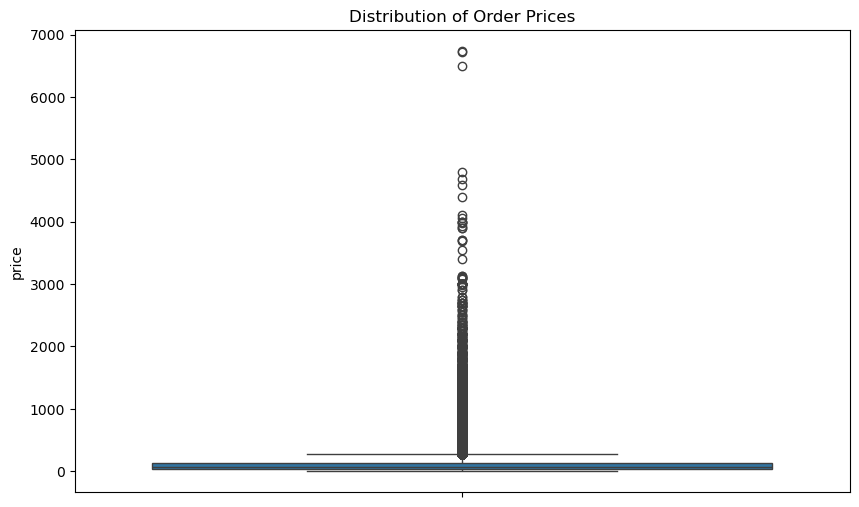

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(y='price', data=df)
plt.title('Distribution of Order Prices')
plt.show()

In [59]:
avg_freight_by_state = df.groupby('customer_state')['freight_value'].mean().reset_index()

fig = px.choropleth(avg_freight_by_state, 
                    locations='customer_state', 
                    locationmode='USA-states', 
                    color='freight_value',
                    color_continuous_scale="Blues", 
                    scope="usa")
fig.update_layout(title_text='Shipping Cost by State')
fig.show()

In [99]:
import plotly.express as px
import json
import pandas as pd

# Load the GeoJSON file for Brazilian states
with open('brazil-states.geojson') as f:
    brazil_geo = json.load(f)

# Assuming your df has a 'customer_state' column with Brazilian state abbreviations
# Calculate the average freight value for each state
avg_freight_by_state = df.groupby('customer_state')['freight_value'].mean().reset_index()

# Create the choropleth map using the GeoJSON for Brazilian states
fig = px.choropleth(avg_freight_by_state, 
                    geojson=brazil_geo, 
                    locations='customer_state', 
                    featureidkey="properties.sigla",  # Adjust to match your GeoJSON's state code field
                    color='freight_value',
                    color_continuous_scale="Blues")

# Update the layout to center the map on Brazil
fig.update_geos(fitbounds="locations", visible=False)

# Add a title
fig.update_layout(title_text='Shipping Cost by Brazilian State')

# Show the plot
fig.show()


FileNotFoundError: [Errno 2] No such file or directory: 'brazil-states.geojson'

In [ ]:
import plotly.express as px
import json
import pandas as pd

# Load the GeoJSON file for Brazilian states
with open('path/to/your/data/brazil.json') as f:  # Update the path accordingly
    brazil_geo = json.load(f)

# Assuming your df has a 'customer_state' column with Brazilian state abbreviations
# Calculate the average freight value for each state
avg_freight_by_state = df.groupby('customer_state')['freight_value'].mean().reset_index()

# Create the choropleth map using the GeoJSON for Brazilian states
fig = px.choropleth(avg_freight_by_state, 
                    geojson=brazil_geo, 
                    locations='customer_state', 
                    featureidkey="properties.sigla",  # Adjust based on your GeoJSON's state code field
                    color='freight_value',
                    color_continuous_scale="Blues")

# Update the layout to center the map on Brazil
fig.update_geos(fitbounds="locations", visible=False)

# Add a title
fig.update_layout(title_text='Shipping Cost by Brazilian State')

# Show the plot
fig.show()


## Order Density by Day of Week (Bar Chart)

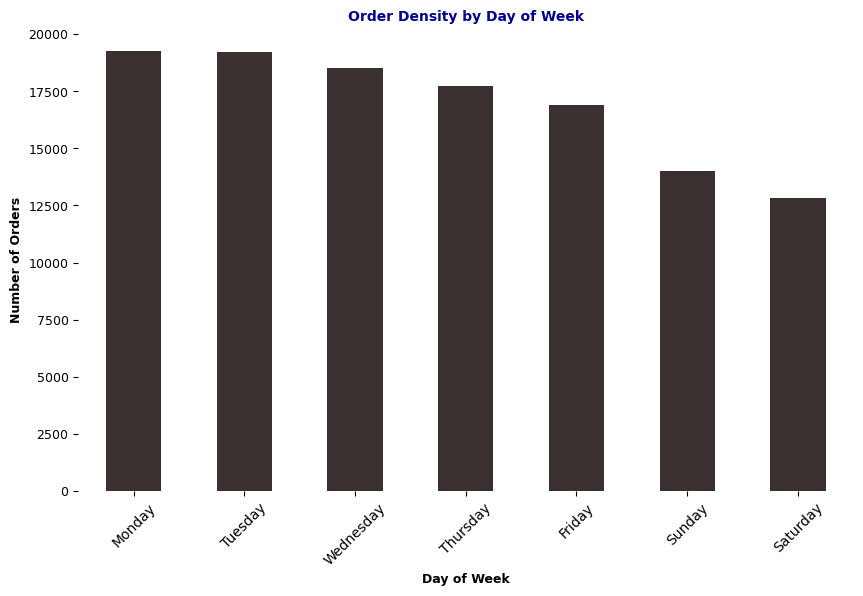

In [110]:
import matplotlib.pyplot as plt

# Extract the day of the week from the order purchase timestamp
df['day_of_week'] = df['order_purchase_timestamp'].dt.day_name()
day_of_week_count = df['day_of_week'].value_counts()

# Plot
plt.figure(figsize=(10,6))
ax = day_of_week_count.plot(kind='bar', color='#3B3030')

# Format the plot
plt.title('Order Density by Day of Week', fontsize=10, fontweight='bold', color='darkblue')
plt.xlabel('Day of Week', fontsize=9, fontweight='semibold')
plt.ylabel('Number of Orders', fontsize=9, fontweight='semibold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=9)

# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove the gridlines
plt.grid(False)

# Show the plot
plt.show()


## Customer Acquisition Over Time (Cumulative Line Chart)

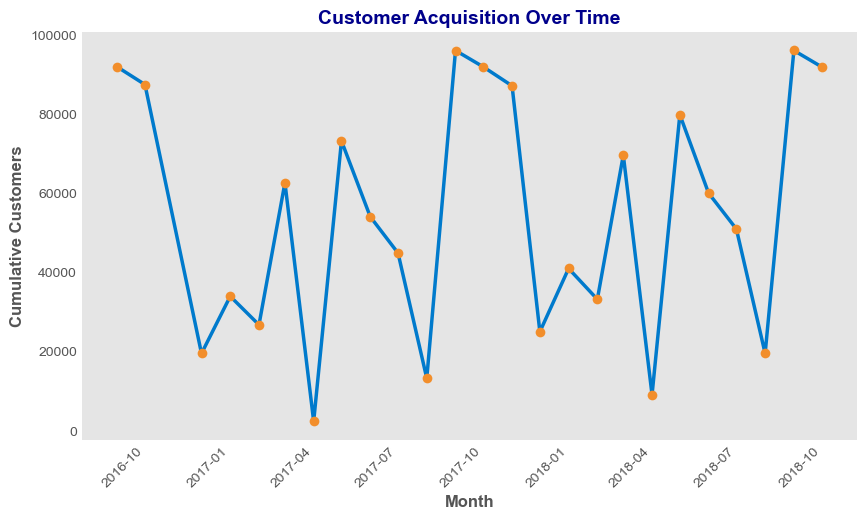

In [129]:
# Convert 'acquisition_date' to datetime and extract the month in a consistent format
df['acquisition_date'] = df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min')

# Group by month and calculate cumulative customers
acquisition_over_time = df.groupby(df['acquisition_date'].dt.strftime('%b %Y'))['customer_unique_id'].nunique().cumsum()

# Sort the months chronologically
acquisition_over_time.index = pd.to_datetime(acquisition_over_time.index, format='%b %Y')
acquisition_over_time = acquisition_over_time.sort_index()

# Plot with smooth line and professional style
plt.figure(figsize=(10,6))
ax = acquisition_over_time.plot(kind='line', linestyle='-', color='#007ACC', linewidth=2.5, marker='o', markersize=7, markerfacecolor='#F28E2B', markeredgewidth=0)

# Format the plot
plt.title('Customer Acquisition Over Time', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Month', fontsize=12, fontweight='semibold')
plt.ylabel('Cumulative Customers', fontsize=12, fontweight='semibold')

# Customize ticks with month names ordered properly
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()

 ## Average Shipping Time by Seller (Bar Chart)

## Top 10 Cities by Order Volume (Bar Chart)

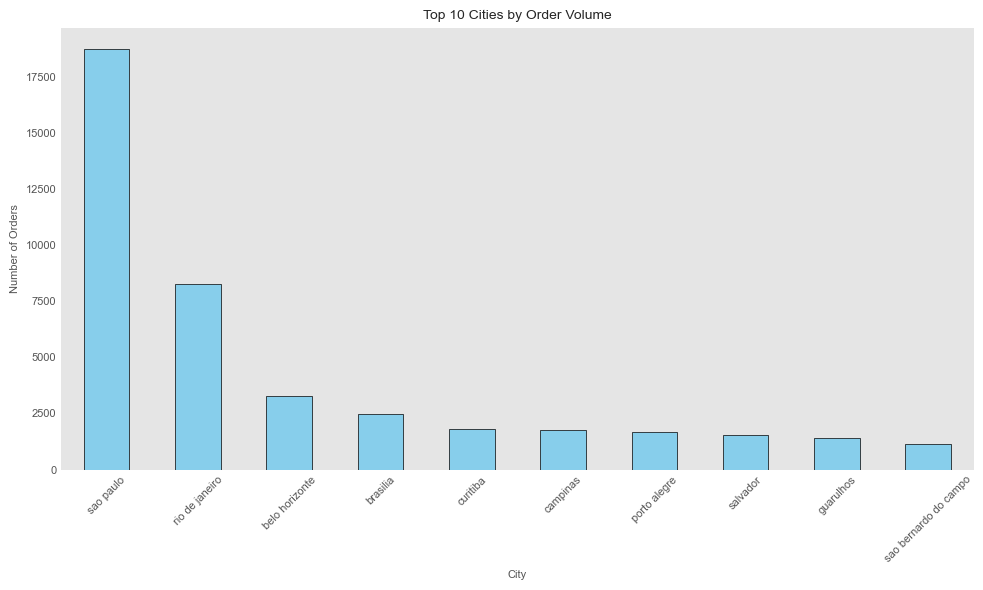

In [128]:
# Get the top 10 cities by order volume
top_10_cities = df['customer_city'].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(10,6))

# Plotting a bar chart with formatting
top_10_cities.plot(kind='bar', color='skyblue', edgecolor='black')

# Customizing the title and labels
plt.title('Top 10 Cities by Order Volume', fontsize=10)
plt.xlabel('City', fontsize=8)
plt.ylabel('Number of Orders', fontsize=8)

# Removing gridlines
plt.grid(False)

# Removing spines (top, right, left, and bottom)
for spine in ['top', 'right', 'left', 'bottom']:
    plt.gca().spines[spine].set_visible(False)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, fontsize=8)

# Adjusting y-axis tick font size
plt.yticks(fontsize=8)

# Adding space for the title and adjusting layout
plt.tight_layout()

# Show the plot
plt.show()


## Top 10 Product Categories by Sales (Treemap)

In [135]:
# Grouping the data to get the top 10 product categories by sales
top_10_categories = df.groupby('product_category_name_eng')['price'].sum().nlargest(10).reset_index()

# Create a treemap with improved design using Plotly
fig = px.treemap(top_10_categories, 
                 path=['product_category_name_eng'],  # Define the category for the treemap
                 values='price',                     # Use the total price as size
                 color='price',                      # Add color based on price
                 color_continuous_scale='Blues',    # Choose a color scale (customizable)
                 title='Top 10 Product Categories by Sales'
                )

# Update the layout to include price labels with dollar sign
fig.update_traces(
    textinfo='label+value',  # Show label and value
    texttemplate='%{label}<br>$%{value:,.2f}'  # Format value with dollar sign
)

# Update the layout for a professional look
fig.update_layout(
    title_font_size=15,
    title_x=0.5,                           # Center the title
    font=dict(size=12),                    # Set font size for labels
    coloraxis_colorbar=dict(title="Total Sales"),  # Colorbar title
    margin=dict(t=50, l=25, r=25, b=25)   # Control margins
)

# Show the treemap
fig.show()

In [124]:
#plt.style.available
plt.style.use('seaborn-v0_8-darkgrid') 

In [136]:
# Grouping the data to get total payment value by state
state_sales = df.groupby('customer_state')['payment_value'].sum().reset_index()

# Sort the states by sales value
state_sales_sorted = state_sales.sort_values(by='payment_value', ascending=False)

# Top 10 States
top_10_states = state_sales_sorted.head(10)

# Create a bar chart for top 10 states
fig_top = px.bar(top_10_states, 
                 x='customer_state', 
                 y='payment_value', 
                 color='payment_value', 
                 color_continuous_scale='Blues',
                 title='Top 10 States by Sales',
                 text='payment_value')

# Update layout for the top 10 chart
fig_top.update_traces(texttemplate='%{text:,.2f}', textposition='outside')
fig_top.update_layout(
    xaxis_title='State',
    yaxis_title='Total Sales ($)',
    title_font_size=16,
    xaxis_tickangle=-45,
    margin=dict(t=50, l=25, r=25, b=50)  # Control margins
)

# Show the top 10 bar chart
fig_top.show()

# Bottom 10 States
bottom_10_states = state_sales_sorted.tail(10)

# Create a bar chart for bottom 10 states
fig_bottom = px.bar(bottom_10_states, 
                    x='customer_state', 
                    y='payment_value', 
                    color='payment_value', 
                    color_continuous_scale='Blues',
                    title='Bottom 10 States by Sales',
                    text='payment_value')

# Update layout for the bottom 10 chart
fig_bottom.update_traces(texttemplate='%{text:,.2f}', textposition='outside')
fig_bottom.update_layout(
    xaxis_title='State',
    yaxis_title='Total Sales ($)',
    title_font_size=16,
    xaxis_tickangle=-45,
    margin=dict(t=50, l=25, r=25, b=50)  # Control margins
)

# Show the bottom 10 bar chart
fig_bottom.show()


## Shipping Cost by State

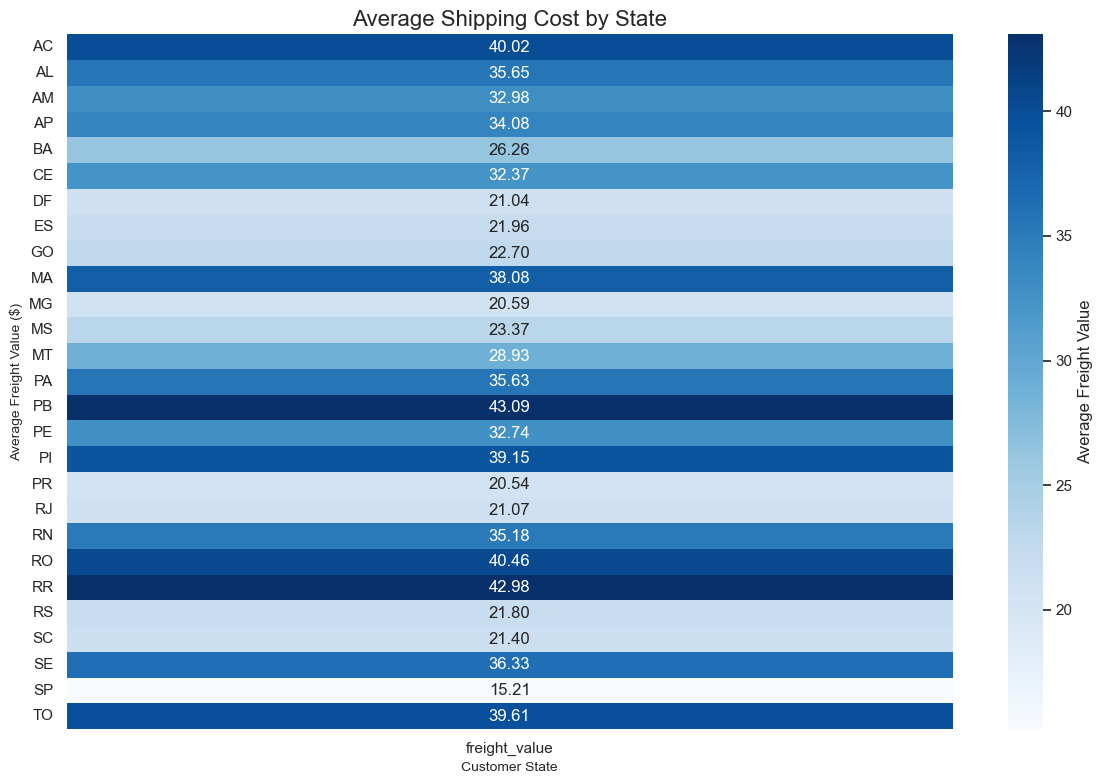

In [141]:

# Prepare the data for the heatmap
avg_freight_by_state = df.groupby('customer_state')['freight_value'].mean().reset_index()

# Set the style
sns.set(style="white")

# Create the figure
plt.figure(figsize=(12, 8))

# Draw the heatmap directly from the DataFrame
# Reshape the DataFrame for heatmap compatibility
heatmap_data = avg_freight_by_state.set_index('customer_state')

# Draw the heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Average Freight Value'})

# Formatting the title and labels
plt.title('Average Shipping Cost by State', fontsize=16)
plt.xlabel('Customer State', fontsize=10)
plt.ylabel('Average Freight Value ($)', fontsize=10)

# Final adjustments and show
plt.tight_layout()
plt.show()

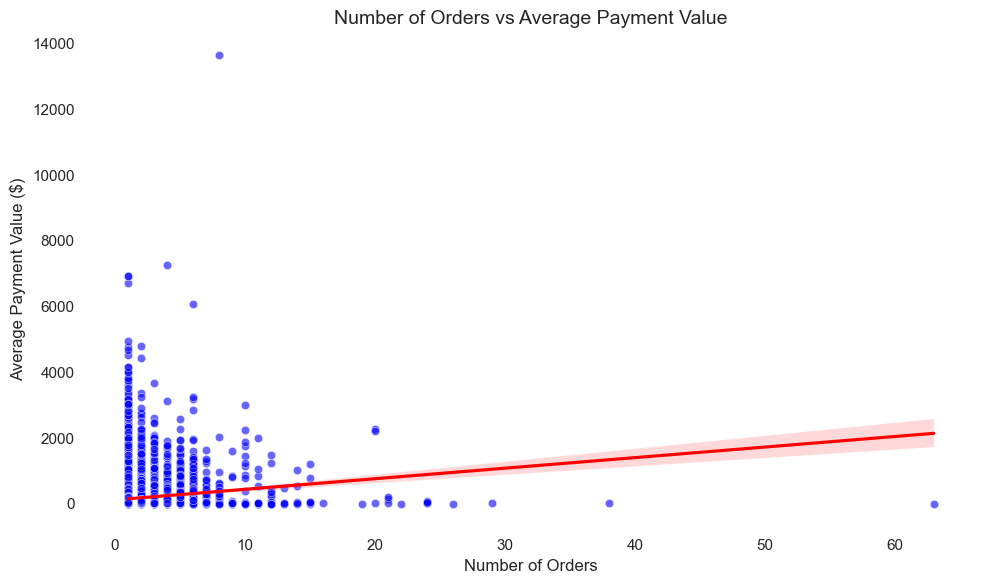

In [140]:
# Grouping and aggregating data
customer_orders = df.groupby('customer_id')['order_id'].count().reset_index(name='order_count')
customer_payment = df.groupby('customer_id')['payment_value'].mean().reset_index(name='average_payment')

# Merge the two aggregated DataFrames
merged_data = pd.merge(customer_orders, customer_payment, on='customer_id')

# Set the overall style
sns.set(style="white", rc={"axes.spines.left": False, "axes.spines.bottom": False})

# Create the figure
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(data=merged_data, x='order_count', y='average_payment', color='blue', alpha=0.6)

# Optional: Add a regression line for better insight
sns.regplot(data=merged_data, x='order_count', y='average_payment', scatter=False, color='red')

# Remove gridlines and spines
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Formatting labels and title
plt.title('Number of Orders vs Average Payment Value', fontsize=14)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Average Payment Value ($)', fontsize=12)

# Final adjustments and show
plt.tight_layout()
plt.show()